In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = pd.DataFrame(dataset.iloc[:,22:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  ...   1   1   1  120   0   0   
44094   2   4   1   1   0   1   1  43   1   1  ...   0   1   1   70   1   1   

       18  19  20  21  
0       2   2   3   1  
1  

In [2]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import optuna
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

c:\Users\eddie\anaconda3\envs\SSTP-Injury\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
def objective(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 10.0),
        "use_label_encoder": False,
        "eval_metric": "mlogloss",
        "random_state": 42
    }

    clf = xgb.XGBClassifier(**param)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(clf, X_train, Y_train, cv=cv, scoring="accuracy", n_jobs=-1)

    return np.mean(score)

study = optuna.create_study(study_name = "xgb", direction="maximize", storage = "sqlite:///xgb.db")
study.optimize(objective, n_trials=50)

print("Best Accuracy: {study.best_value:.4f}")
print("Best Hyperparameters:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

[I 2025-05-30 23:14:32,228] A new study created in RDB with name: xgb
[I 2025-05-30 23:14:41,728] Trial 0 finished with value: 0.9254735147070876 and parameters: {'n_estimators': 550, 'learning_rate': 0.12405150923512745, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 1.656336796584249, 'subsample': 0.6792636752423495, 'colsample_bytree': 0.937945004673681, 'reg_alpha': 0.034826766379212754, 'reg_lambda': 5.78901389857779e-07, 'scale_pos_weight': 3.632716789194643}. Best is trial 0 with value: 0.9254735147070876.
[I 2025-05-30 23:14:52,900] Trial 1 finished with value: 0.9196621620535763 and parameters: {'n_estimators': 559, 'learning_rate': 0.06959159019272189, 'max_depth': 14, 'min_child_weight': 5, 'gamma': 0.334780116159224, 'subsample': 0.6477336440518613, 'colsample_bytree': 0.9580251634964807, 'reg_alpha': 2.6504063013749426e-08, 'reg_lambda': 7.320475265891731e-06, 'scale_pos_weight': 5.952293429732678}. Best is trial 0 with value: 0.9254735147070876.
[I 2025-05-30 23:15:01,0

Best Accuracy: {study.best_value:.4f}
Best Hyperparameters:
  n_estimators: 756
  learning_rate: 0.0866275854498441
  max_depth: 4
  min_child_weight: 6
  gamma: 0.7631066008996149
  subsample: 0.8661672445692452
  colsample_bytree: 0.582635652250222
  reg_alpha: 1.4104293462268088e-06
  reg_lambda: 1.6092303397909688e-07
  scale_pos_weight: 8.18235359953586


In [4]:
model = xgb.XGBClassifier(  
    n_estimators = 756,
    learning_rate = 0.0866275854498441,
    max_depth = 4,
    min_child_weight = 6,
    gamma = 0.7631066008996149,
    subsample = 0.8661672445692452,
    colsample_bytree = 0.582635652250222,
    reg_alpha = 1.4104293462268088e-06,
    reg_lambda = 1.6092303397909688e-07,
    scale_pos_weight = 8.18235359953586)
model.fit(X_train,Y_train)

c:\Users\eddie\anaconda3\envs\SSTP-Injury\lib\site-packages\xgboost\core.py:158: UserWarning: [14:24:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.582635652250222, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.7631066008996149,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0866275854498441,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=756, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [5]:
res = model.predict(X_test)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

       0
42222  0
29490  1
7168   2
35124  1
29931  2
...   ..
41573  2
22780  0
42708  2
28199  2
22171  2

[8819 rows x 1 columns]
0.9222134028801452
              precision    recall  f1-score   support

           0   0.789900  0.784035  0.786957      1616
           1   0.792509  0.798204  0.795346      1670
           2   1.000000  1.000000  1.000000      5533

    accuracy                       0.922213      8819
   macro avg   0.860803  0.860746  0.860768      8819
weighted avg   0.922210  0.922213  0.922208      8819



PermutationExplainer explainer: 8820it [08:14, 17.62it/s]                          
C:\Users\eddie\AppData\Local\Temp\ipykernel_59312\1552002207.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)


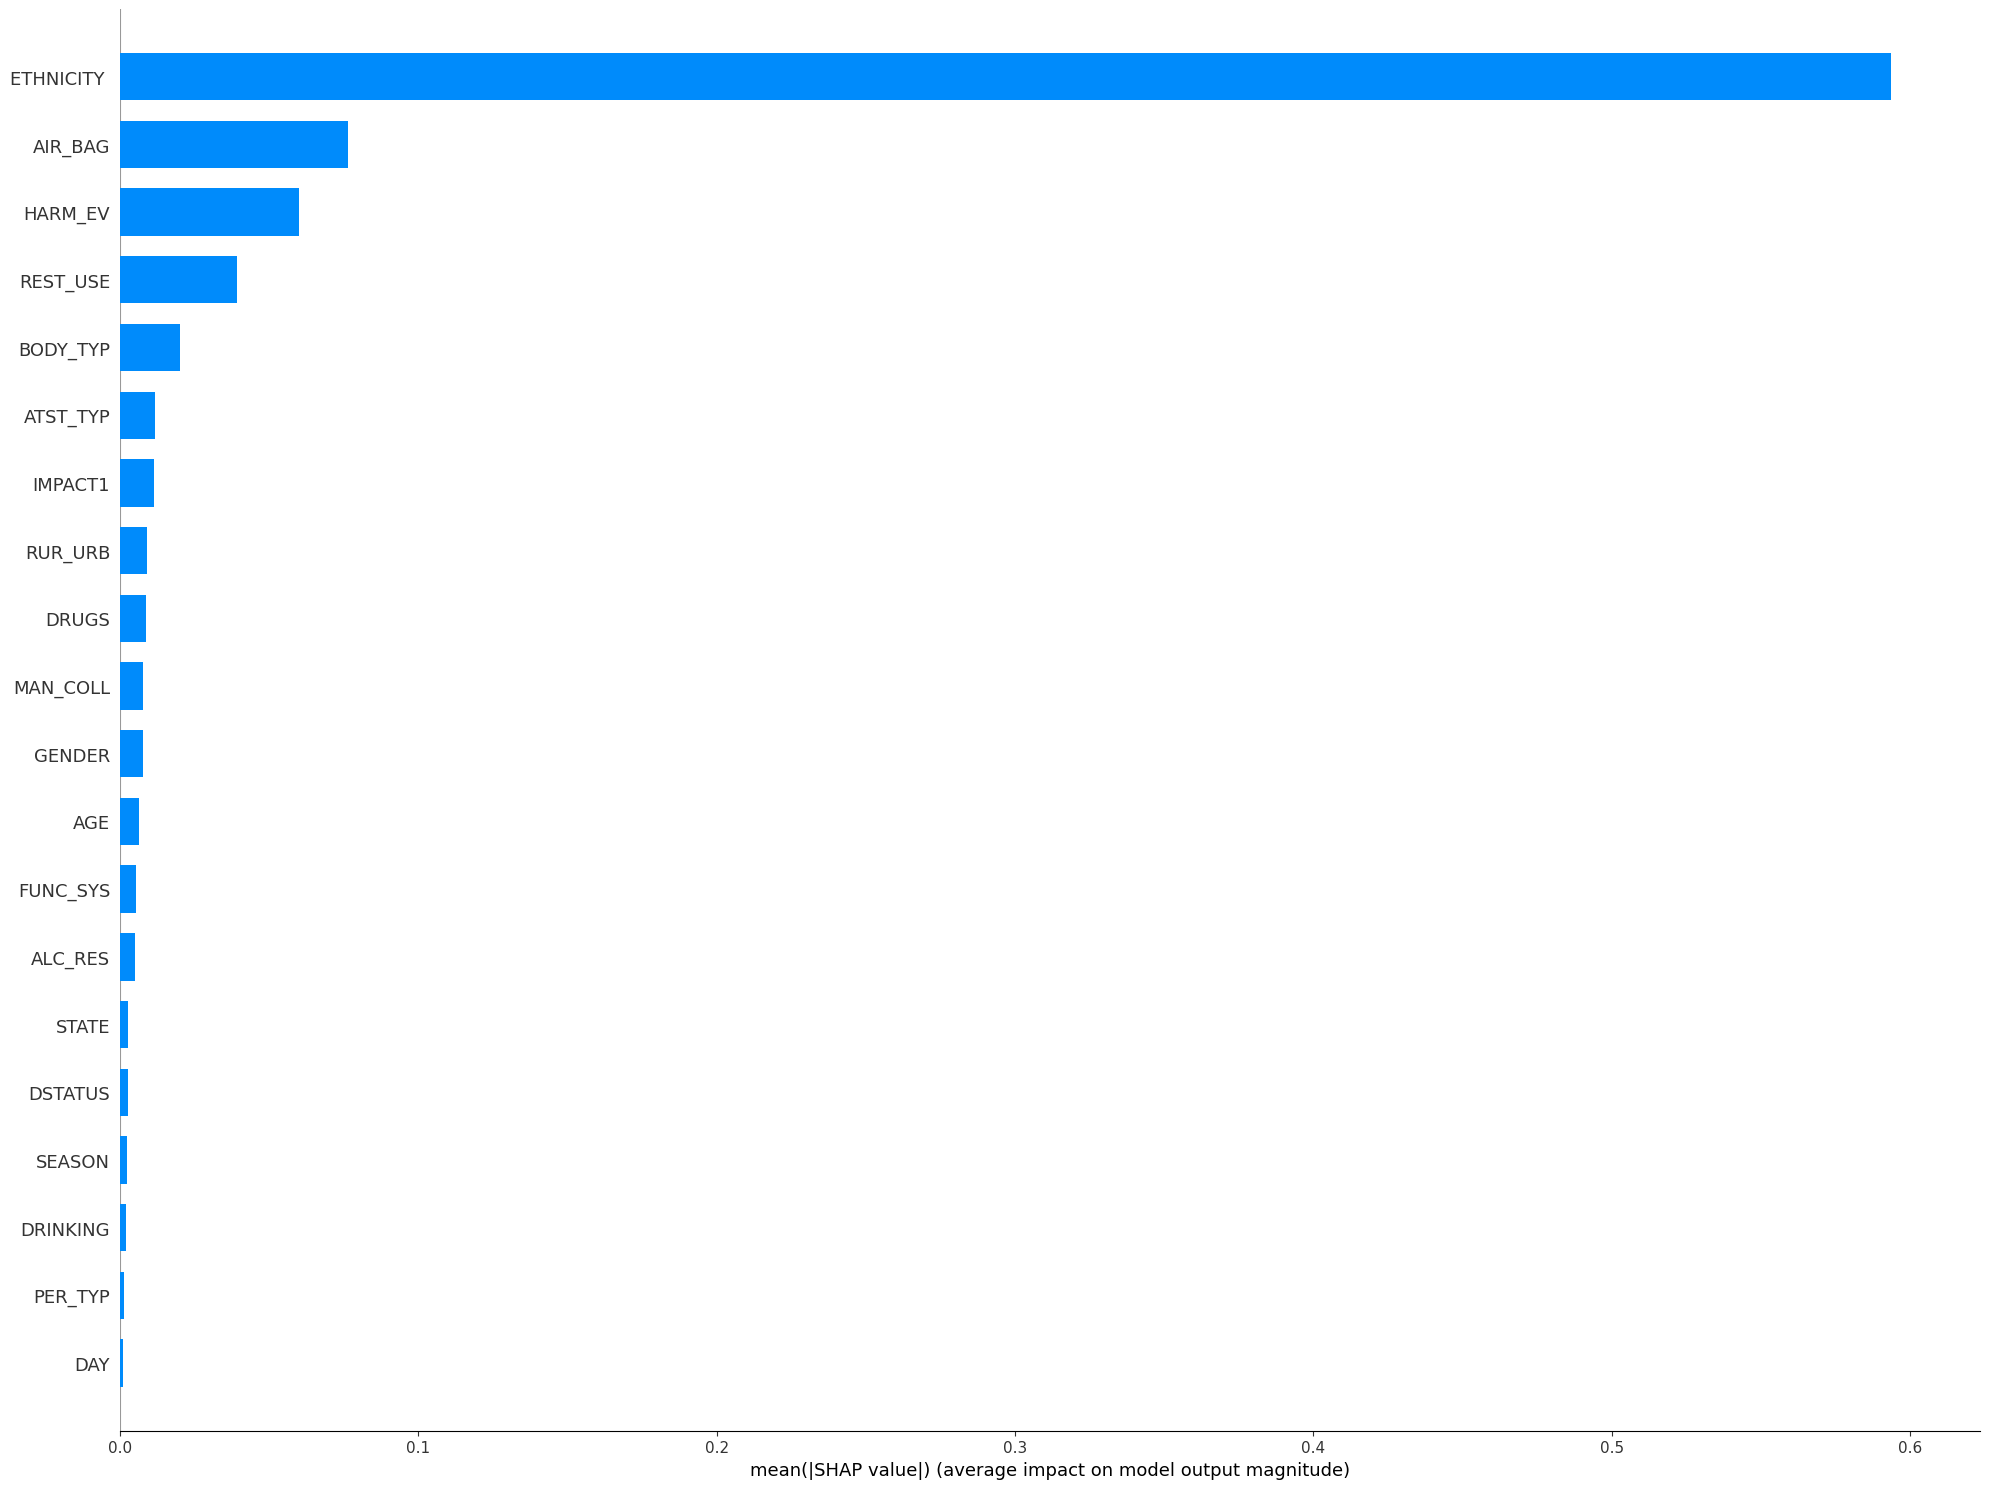

In [8]:
import shap 
explainer = shap.Explainer(model.predict,X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

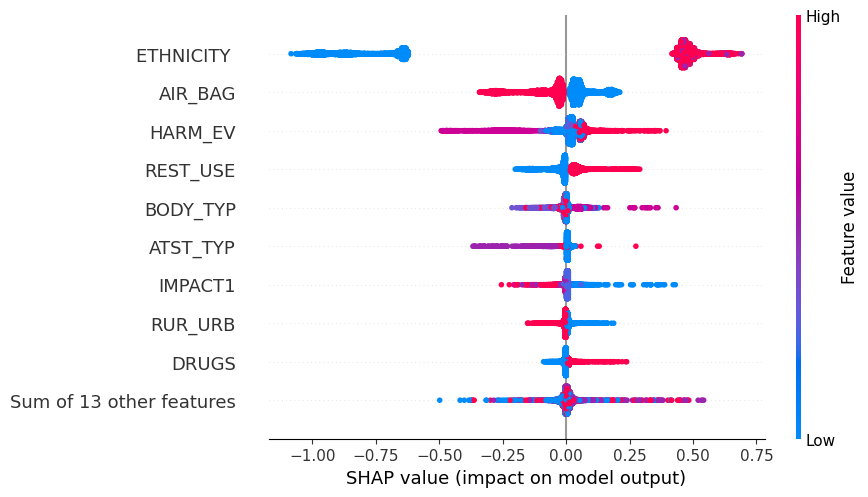

In [9]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)

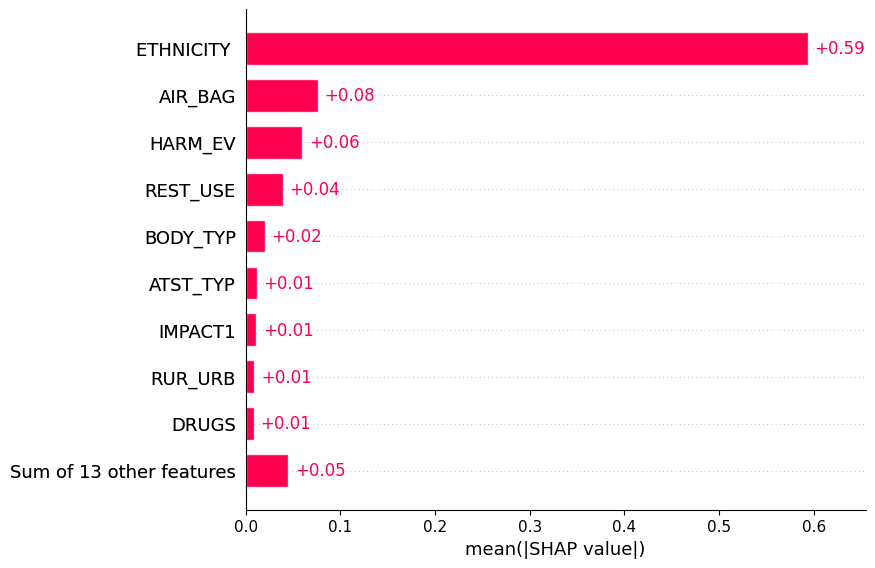

In [10]:
shap.plots.bar(explanation)

In [11]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    shap.plots.waterfall(explanation[i], show=False)
    plt.savefig(os.path.join("shap/xgb/waterfall", f"waterfall_{i}.png"), dpi = 300,bbox_inches="tight")
    plt.close()


In [12]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    shap.force_plot(shap_values[i],feature_names=['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP', 'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ', 'RUR_URB', 'FUNC_SYS', 'IMPACT1'], matplotlib=True, show=False)
    plt.savefig(os.path.join("shap/xgb/force/", f"force_{i}.png"), dpi = 300,bbox_inches="tight")
    plt.close()


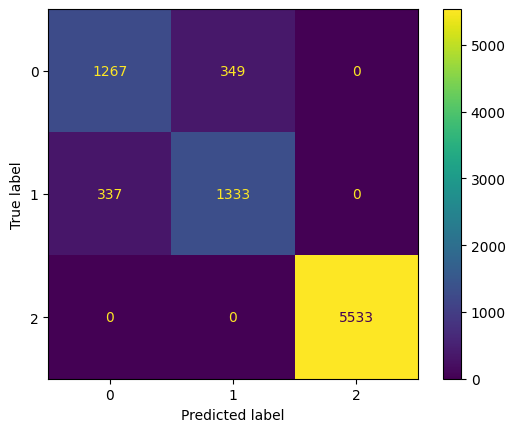

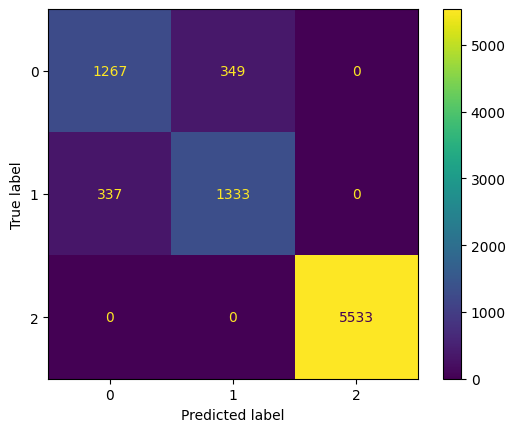

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()
plt.show()

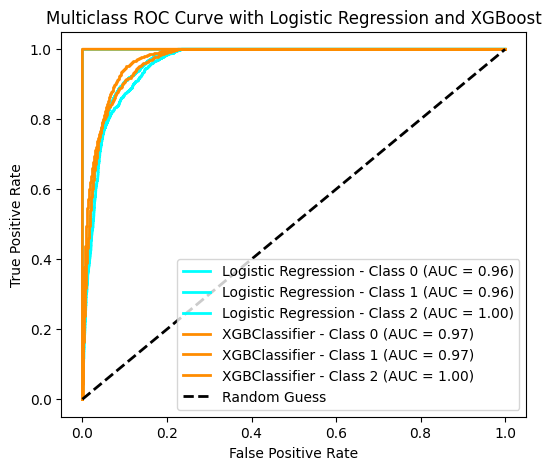

In [6]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

logistic_model = OneVsRestClassifier(LogisticRegression(random_state=42))
logistic_model.fit(X_train, Y_train)

fpr = dict()
tpr = dict()
roc_auc = dict()

y_test = label_binarize(Y_test, classes=np.unique(Y_test))
models = [logistic_model, model]

plt.figure(figsize=(6, 5))
colors = cycle(['aqua', 'darkorange'])

for m, color in zip(models, colors):
    for i in range(m.classes_.shape[0]):
        fpr[i], tpr[i], _ = roc_curve(
            y_test[:, i], m.predict_proba(X_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        name = m.__class__.__name__
        if(m.__class__.__name__=="OneVsRestClassifier"):
            name = "Logistic Regression"
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{name} - Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with Logistic Regression and XGBoost')
plt.legend(loc="lower right")
plt.show()